# <center> KFZ Antriebe LU </center>
<center> Marcus Steinbacher </center>
<center> Gruppe 3</center>

## Aufgabenstellung
### Einleitung
### Zweck der Messung

## Prüfstandsaufbau

## Messdurchführung
### Aufgenommene Messungen
### Mess- und Einstellprozedere
### Randbedingungen

## Ergebnisse

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import fixed, interactive_output
import ipywidgets as widgets

sns.set()

Zur Auswertung wurden die Daten der fünf Messreihen in eine gemeinsame Tabelle überführt, sodass jede Zeile einem einzelnen Messpunkt mit folgenden features darstellt: <br>
`Drehzahl` `Kurbelwinkel` `P_ZYL1` `P_ZYL2` `P_ZYL3` `Drehmoment` `Absolutverbrauch` `Angesaugte Luftmasse` `O2 roh` `CO roh` `CO2 roh` `NOx roh` `HC3 roh` `Lambda` `Temp Kühlm.E` `Temp Kühlm.A` `Temp Oel` `Temp Ansaugl. nach Verd.` `Temp Ansaugluft Saugrohr` `Temp Abgas vor Turbine` `P Saugrohr` `P Abg. vor Turb.` `ZZP` `Cycle` `Volumen` `P_ZYLm`.

In [2]:
df = pd.read_csv("cyl_raw.csv",delimiter=";")
df.head()

,Drehzahl,Kurbelwinkel,P_ZYL1,P_ZYL2,P_ZYL3,Drehmoment,Absolutverbrauch,Angesaugte Luftmasse,O2 roh,CO roh,...,Lambda,Temp Kühlm.E,Temp Kühlm.A,Temp Oel,Temp Ansaugl. nach Verd.,Temp Ansaugluft Saugrohr,Temp Abgas vor Turbine,P Saugrohr,P Abg. vor Turb.,ZZP
0,1600,-360,1.043,1.040,1.014,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
1,1600,-359,1.048,1.037,1.011,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
2,1600,-358,1.053,1.045,1.024,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
3,1600,-357,1.061,1.054,1.028,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8
4,1600,-356,1.067,1.055,1.033,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,8


Um in der weiteren Auswertung die Messkurve der einzelnen Takte untersuchen zu können, wird das feature `Cycle` eingeführt, indem das Gesamtintervall -360° v.OT bis 360° n.OT in vier 180° Subintervalle zerlegt wird. Dabei erfolgt folgende zuordnung: <br>
<br>
$$ \text{Ansaugen: } 0 \text{ für } \phi \in -360° v.OT , -180° v.OT $$
$$ \text{Verdichten: } 1 \text{ für } \phi \in -180° v.OT , -0° v.OT $$
$$ \text{Arbeiten: } 2 \text{ für } \phi \in +0° n.OT , 180° n.OT $$
$$ \text{Ausstoßen: } 3 \text{ für } \phi \in 180° n.OT , 360° n.OT $$

In [3]:
# cycle identifizieren
# 180°: Ansaugen, 180°: Verdichten,...
d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
cycle = [0]*180 + [1]*180 + [2]*180 + [3]*180
cycles = cycle*len(df["Drehzahl"].unique())
df["Cycle"]  = cycles

Das `Volumen` in Abhängigkeit des Winkels $\phi$ berechnet sich folgendermaßen: <br>
$$
x(\phi) =
$$
$$
V(\phi) = \frac{}{}
$$
Daraus ergibt sich ein Hubvolumen $V_H$ von $V_H = V(180°) - V(0°) = (\frac{b}{2})^2 * \pi * h= 318090 mm³$ und ein Hubraum von $H = n_{zyl} * V_H = 954 ccm$.

Hubvolumen: 318089.3977686201 mm³
Hubram: 954.2681933058603 ccm


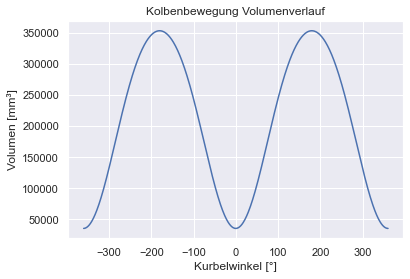

In [103]:
# volumen in abh. des winkels berechnen
VH = (73/2)**2 * m.pi * 76 #mm³

def volume(winkel, h=76,l=135,dea=-0.6,s=0,eps=10,b=73):
    """
    params:
        winkel: Kurbelwinkel [°]
        h: Kolbenhub [mm]
        l: Pleuellänge [mm]
        dea: Deachsierung [mm]
        s: Schränkung [mm]
        eps: Verdichtungsverhältnis [1]
        b: Bohrung [mm]
    returns: 
        Volumen in Abh. von winkel [mm**3]
    """
    v_hub = (b/2)**2 * m.pi * h #mm**3
    x = h/2 * (1 - m.cos(m.radians(winkel))) + l * (1 - m.sqrt(1 - ((h*m.sin(m.radians(winkel)))/(2*l) - (dea-s)/l)**2))
    v = v_hub/(eps-1) + b**2 *(m.pi/4) * x
    return v

df["Volumen"] = df["Kurbelwinkel"].map(volume)

x = np.linspace(-360,360,720)
y = list(map(lambda w:volume(w),x))

plt.xlabel("Kurbelwinkel [°]")
plt.ylabel("Volumen [mm³]")
plt.title("Kolbenbewegung Volumenverlauf")
plt.plot(x,y)
print(f"Hubvolumen: {volume(180)-volume(0)} mm³")
print(f"Hubram: {(volume(180)-volume(0))*3*10**(-3)} ccm")

Da es sich um eine 3-Zylinder Ottomotor handelt wird zunächst der mittlere Druck `P_ZYLm` für jeden Messpunkt als arithmetisches Mittel der Einzeldrücke in den jeweiligen Zylindern  gebildet: <br>
$$
p_{ZYLm} = \frac{\sum{p_{ZYL,i}}}{3}
$$

In [5]:
# Druck Mittelwert
df["P_ZYLm"] = df.loc[:,["P_ZYL1","P_ZYL2","P_ZYL3"]].mean(axis=1)
#df.head()

### Druckverlauf
Nachfolgende Abbildung zeigt den mit steigender `Drehzahl` bei Leistungskonstanter Fahrt zu erwartenden sinkenden mittleren Zylinderdruck `P_ZYLm` über dem `Kurbelwinkel`:

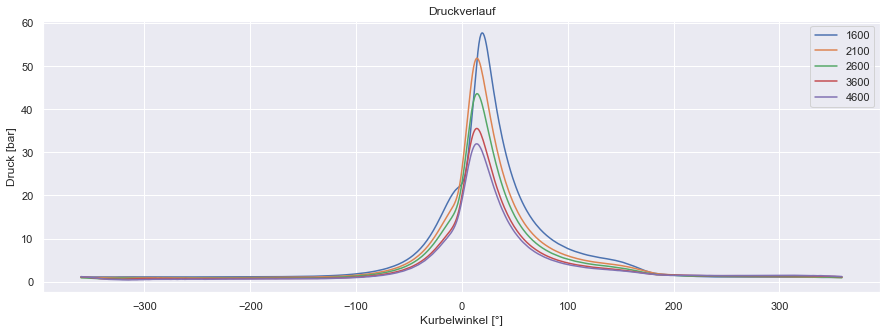

In [6]:
#Druckverlauf alle Drehzahlen plotten
fig, ax = plt.subplots(1,1,figsize=(15,5))
for rpm in df["Drehzahl"].unique():
    df_rpm = df[df["Drehzahl"]==rpm]
    ax.plot(df_rpm["Kurbelwinkel"],df_rpm["P_ZYLm"],label=rpm)
ax.set_title("Druckverlauf")
ax.set_xlabel("Kurbelwinkel [°]")
ax.set_ylabel("Druck [bar]")
plt.legend()
plt.show()

#### Maximaldruck
Der Maximaldruck ist bei einer `Drehzahl` von 1600U/min beinahe doppelt so große wie bei der gemessenen Maximaldrehzahl 4600 U/min. Die Regressionsanalyse lässt einen linearen Trend erkennen.

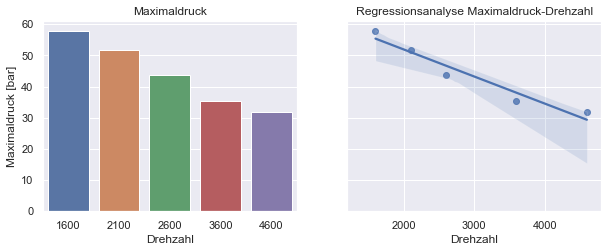

In [7]:
#bar  plot max druck
# verlauf max-druck über drehzahl (trendkurve)

df_max = df.groupby(by="Drehzahl",as_index=False).max()

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,3.5),sharey=True)

sns.barplot(data=df_max,x="Drehzahl",y="P_ZYLm",ax=axs[0])
axs[0].set_ylabel("Maximaldruck [bar]")
axs[0].set_title("Maximaldruck")
sns.regplot(data=df_max,x="Drehzahl",y="P_ZYLm",ax=axs[1],order=1)
axs[1].set_xlim(left=1200,right=4800)
axs[1].set_title("Regressionsanalyse Maximaldruck-Drehzahl")
axs[1].set_ylabel("")

plt.show()

#### Druckverlauf und ZZP
Eine genauere Untersuchung unter Einbeziehung des Zündzeitpunkts `ZZP`lässt eine Unstetigkeit des Druckverlaufs für 1600 U/min um den ZZP erkennen: 

In [8]:
#Druck verlauf über Winkel mit ZZP
def ZZP(rpm,log=False,ax=None,over="volume"):
    '''
    params:
        rpm: Drehzahl in [1600,2100,2600,3600,4600]
        log: bool, True: y-Achse log skala
        ax: default: None, erstellt fig,ax. Sonst existiedendes plt.axes, um darauf zu plotten
        over: x-achse über der zu plotten ist in ["volume","angle"]
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ZZP = df_rpm["ZZP"].unique()[0]
    
    
    if not ax:
        fig,ax = plt.subplots()
        
    if over == "volume":
        x = volume(-ZZP)
    elif over == "angle":
        x = -ZZP
    ax.scatter(x,df_rpm[(df_rpm["Cycle"]==1) & (df_rpm["Kurbelwinkel"]==-ZZP)]["P_ZYLm"],color="red",label="ZZP")

def p_angle(rpm,log=False,ax=None):
    '''
    params:
        rpm: Drehzahl
        ax: existierendes plt.axes object. falls None wird eines erstellt
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots()
    
    ax.plot(df_rpm["Kurbelwinkel"],df_rpm["P_ZYLm"])
    ax.set_xlabel("Kurbelwinkel [°]")
    ax.set_ylabel("Druck [bar]")
    ax.set_title(f"Druckverlauf {rpm} U/min")
    
    if log:
        ax.set_yscale("log")
        ax.set_ylabel("log Druck [bar]")

        
rpm_dropd = widgets.Dropdown(options = df["Drehzahl"].unique(),value=2100)

def plot1(rpm,**kwargs):
    fig, ax = plt.subplots(figsize=(10,5))
    p_angle(rpm,ax=ax)
    ZZP(rpm,ax=ax,over="angle")
    plt.legend()

out1 = interactive_output(plot1,{"rpm":rpm_dropd})
display(rpm_dropd,out1)

Dropdown(index=1, options=(1600, 2100, 2600, 3600, 4600), value=2100)

Output()

TODO Deutung Unstetigkeit bei 1600 und ZZP <br>
### p-V-Diagramm
Bei genauerer Betrachtung des p-V- Diagramms zeigt sich für die Ladungswechselschleife, dass bei einer `Drehzahl` von 1600 U/min die Ansaug-Kurve über der Ausstoß-Kurve liegt. Bei steigender Drehzahl kehrt sich dieses Verhältnis um. <br>
**TODO** Begründung Turbo? Arbeit positiv bei steigender Drehzahl? <br>
Weiters lassen sich v.a. bei einer logarithmischen Skalierung des Drucks auf der Ordinate bei steigenden Drehzahlen  zunehmende Schwankungen des Druckverlaufs im unteren Druckniveau erkennen. 

In [9]:
#p-V Diagramm mit Zyklen (Ansaugen, Kompression, ...)
def pV(rpm,log=False,ax=None):
    '''
    Plotted ein p-V-Digramm für die angegebene Drehzahl {rpm}
    params:
        rpm:
        log:
        ax:
    '''
    d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
    for cyc in df_rpm["Cycle"].unique():
        df_rpm_cyc = df_rpm[df_rpm["Cycle"]==cyc]
        ax.plot(df_rpm_cyc["Volumen"],df_rpm_cyc["P_ZYLm"],label=d[cyc])

    ax.set_xlabel("Volumen [mm³]")
    ax.set_ylabel("Druck [bar]")
    if log:
        ax.set_yscale("log")
        ax.set_ylabel("log Druck [bar]")
    
    plt.title(f"p-V Diagramm {rpm} U/min")
    
    
log_checkb = widgets.Checkbox(value=True,description="log Skala")

def plot2(rpm,log=None,**kwargs):
    
    fig,ax = plt.subplots(figsize=(10,5))
    pV(rpm,log=log,ax=ax)
    ZZP(rpm,log=log,ax=ax)

    plt.legend()
    
out2 = interactive_output(plot2,{"rpm":rpm_dropd,"log":log_checkb})

display(widgets.HBox([rpm_dropd,log_checkb]),out2)

Output()

### Hochdruck- und Ladungswechselschleife
Zur Ermittlung des indizierten Mitteldrucks $p_{mi}$ ist es zunächst notwendig, die Hochdruck- und Ladungswechselschleifen im p-V-Diagramm zu berechnen. <br>
Der Vorgang soll am Beispiel des obigen p-V-Diagramms bei einer `Drehzahl` von 4600 U/min beschrieben werden:<br> 
Die Ladungswechselschleife (ND) ist nach unten von der Ansaugkurve (blau) begrenzt. Nach oben begrenzt sie das **Minimum** von Verdichtungskurve (orange) und Ausstoßverlauf (rot). <br>
Analoges gilt für die HD Schleife: Sie ist nach oben durch den Druckverlauf des Arbeitstaktes (grün) und nach unten durch das **Maximum** von Verdichtungs- und Arbeitskurve. 

In [96]:
# Arbeit HD, ND Schleife
# HD -> cycle 2 - max(cycle1,cycle3)
# ND -> min(cycle3,cycle1) - cycle0
def HD(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Hochdruckschleife als Kombination der Drucklinien der einzelnen Zyklen folgenderweise:
    HD nach oben durch Arbeits-Druckverlauf (Cycle=2) begrenzt und nach unten durch das Maximum von Ausstoß- (Cycle=3) 
    und Verdichtungs-verlauf (Cycle=1).
    ND nach unten durch Ansaug-verlauf (Cycle=0) begrenzt und nach oben durch das Minimum von Ausstoß (3) und
    Verdichtungs-verlauf (1).
    
    params:
        rpm:
        log:
        ax:
        plot: default True. False falls nur die HD Arbeit zurückgegeben werden soll.
    returns:
        HD Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    HD = df_rpm[df_rpm["Cycle"]==2].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD.rename(columns={"P_ZYLm":"upper"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD_lower = [max(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    HD["lower"] = HD_lower
    
    if plot:
        if not ax:
            fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
        ax.plot(HD["Volumen"],HD["upper"],label="HD upper")
        ax.plot(HD["Volumen"],HD["lower"],label="HD lower")
        
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(HD["Volumen"],HD["lower"],HD["upper"],label="W_HD",alpha=0.5)
    
    w_upper = np.trapz(HD["upper"],x=HD["Volumen"]) #bar*mm³
    w_lower = np.trapz(HD["lower"],x=HD["Volumen"])
    return (w_upper - w_lower) #bar*mm³

def ND(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Niederdruckschleife. Doc analog HD
    
    params:
        rpm:
        log:
        ax:
        plot:
    returns:
        ND Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ND = df_rpm[df_rpm["Cycle"]==0].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND.rename(columns={"P_ZYLm":"lower"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND_upper = [min(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    ND["upper"] = ND_upper
    
    if plot:
        if not ax:
            fig,ax = plt.subplots()
            
        ax.plot(ND["Volumen"],ND["upper"],label="ND upper")
        ax.plot(ND["Volumen"],ND["lower"],label="ND lower")
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(ND["Volumen"],ND["lower"],ND["upper"],label="W_ND",alpha=0.5)
    
    w_upper = np.trapz(ND["upper"],x=ND["Volumen"]) #bar*mm³
    w_lower = np.trapz(ND["lower"],x=ND["Volumen"])
    return (w_upper - w_lower) #bar*mm³


def plot3(rpm,log=None,**kwargs):
    fig,ax = plt.subplots(figsize=(10,6.5))
    HD(rpm,log=log,ax=ax)
    ND(rpm,log=log,ax=ax)
    ZZP(rpm,log=log,ax=ax)
    plt.title("p-V Diagramm HD, ND")
    plt.legend()

out3 = interactive_output(plot3,{"rpm":rpm_dropd,"log":log_checkb})
display(widgets.HBox([rpm_dropd,log_checkb]),out3)

Output()

#### Indizierter Mitteldruck
Es zeigt sich, dass die Arbeit $W_{ND,1600}$ der ND Schleife bei 1600 U/min negativ ist. Für größere Drehzahlen nimmt $W_{ND}$ positive Vorzeichen an.<br> 
Nachfolgende Abbildung zeigt den indizierten Mitteldruck $p_{mi,HD} = \frac{W_{HD}}{V_H}$ und $p_{mi,ND}=\frac{W_{ND}}{V_H}$ für verschiedene Drehzahlen sowie den resutierenden indizierten Mitteldruck $p_{mi} = p_{mi,HD} + p_{mi,ND}$:

,Drehzahl,pmiHD,pmiND,pmi
0,1600,12.029887,-0.018560,12.011327
1,2100,9.516066,0.206778,9.722844
2,2600,8.140450,0.353091,8.493540
3,3600,6.593034,0.469924,7.062959
4,4600,5.914980,0.597398,6.512377


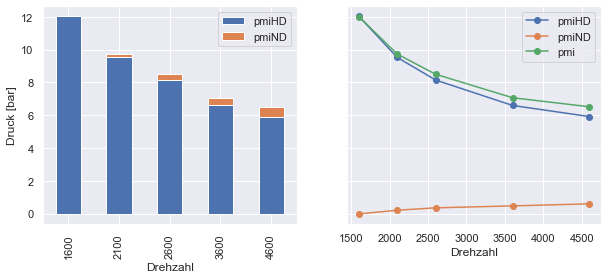

In [148]:
#pmiHD = WHD/VH

RPMs = df["Drehzahl"].unique()
pmiHD = [HD(rpm,plot=False)/VH for rpm in RPMs] #bar
pmiND = [ND(rpm,plot=False)/VH for rpm in RPMs]
df_pm = pd.DataFrame({"Drehzahl":RPMs,"pmiHD":pmiHD,"pmiND":pmiND})
df_pm["pmi"] = df_pm["pmiHD"]+df_pm["pmiND"]
fig,axs = plt.subplots(1,2,figsize=(10,4),sharey=True)

df_pm.loc[:,["Drehzahl","pmiHD","pmiND"]].plot(kind="bar",x="Drehzahl",stacked=True,ax=axs[0])
df_pm.plot(kind="line",x="Drehzahl",ax=axs[1],style=["-o"]*3)
axs[0].set_ylabel("Druck [bar]")

df_pm

Es ist zu erkennen, dass mit steigender Drehzahl der Anteil von $p_{mi,ND}$ an $p_{mi}$ zunimmt.

#### Effektiver Mittteldruck
Der effektive Mitteldruck $p_{me}$ errechnet sich aus den an der Welle bei den verschiedenen Drehmometen abgenommenen Drehmomenten: <br>
$$
p_{me,rpm} = \frac{2*2*\pi*M_{rpm}}{V_H}
$$

In [150]:
def pme(rpm):
    M_rpm = df[df["Drehzahl"]==rpm]["Drehmoment"].unique()[0] #Nm
    return 4*m.pi*M_rpm*10**(3) /VH #bar

pme(1600)
df_pm["pme"] = [pme(rpm) for rpm in RPMs]
df_pm

,Drehzahl,pmiHD,pmiND,pmi,pme
0,1600,12.029887,-0.018560,12.011327,3.539718
1,2100,9.516066,0.206778,9.722844,2.698245
2,2600,8.140450,0.353091,8.493540,2.180719
3,3600,6.593034,0.469924,7.062959,1.572330
4,4600,5.914980,0.597398,6.512377,1.228630


#### Reibmitteldruck
Der Reibmitteldruck berechnet mittels der Differenz von indiziertem Mitteldruck und effektivem Mitteldruck. <br>
$$p_{mr} = p_{mi} - p_{mr}$$

,Drehzahl,pmiHD,pmiND,pmi,pme,pmr
0,1600,12.029887,-0.018560,12.011327,3.539718,8.471608
1,2100,9.516066,0.206778,9.722844,2.698245,7.024599
2,2600,8.140450,0.353091,8.493540,2.180719,6.312821
3,3600,6.593034,0.469924,7.062959,1.572330,5.490629
4,4600,5.914980,0.597398,6.512377,1.228630,5.283748


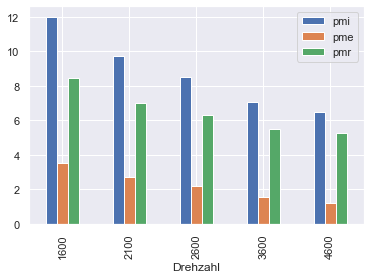

In [156]:
df_pm["pmr"] = df_pm["pmi"] - df_pm["pme"]
df_pm.plot(kind="bar",x="Drehzahl",y=["pmi","pme","pmr"])
df_pm

### Zyklische Größen
#### Brennstoffenergie $Q_{Brst/Zykl}$


In [11]:
#Zusammenfassung aller Ergebnisse in Ergebnistabelle -> Korrelationsanalyse
#zB weitere Größen:  Verbrauch-Drehzahl,ZZP-Drehzahl (ZZP wandert nach vorne)

<AxesSubplot:xlabel='Volumen'>

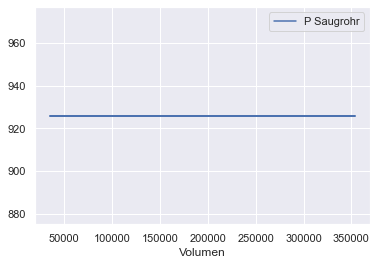

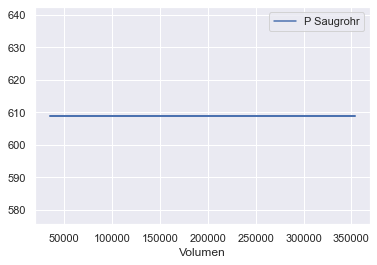

In [12]:
df[df["Drehzahl"]==2100].plot("Volumen","P Saugrohr")
df[df["Drehzahl"]==4600].plot("Volumen","P Saugrohr")

(array([ 1,  1,  0, -1,  0,  0, -1,  0]),
 array([ 0,  0,  1,  0, -1, -1,  0,  1]),
 array([ 1,  1,  0, -2,  0,  0,  0,  0]))

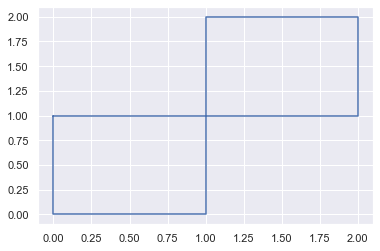

In [13]:
def sign(a):
    return np.array(list(map(lambda x: 1.0 if x >= 0 else -1.0 ,a)))

def lineintegrate(y,x):
    dx = np.diff(x)
    dy = np.diff(y)
    vz = sign(dx*dy)
    s = vz*np.sqrt(dx**2 + dy**2)
    
    if (x[0],y[0]) == (x[-1],y[-1]):
        return s*y[:-1]

x = np.array([0,1,2,2,1,1,1,0,0])
y = np.array([1,1,1,2,2,1,0,0,1])

A = np.trapz(y,x=x)

plt.plot(x,y)

dx = np.diff(x)
dy = np.diff(y)
s = np.sqrt(dx**2 + dy**2)
v = np.diff(x)*y[:-1]
dx,dy,v